In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
df=pd.read_csv('daily_data.csv')
df

,datetime,high,low,close,open,volume
0,01-01-2018,13818.55,12750.00,13135.00,13715.65,6970.441076
1,02-01-2018,14750.00,12890.02,14580.00,13135.00,16359.347340
2,03-01-2018,15473.49,14150.00,14749.97,14576.87,19457.238600
3,04-01-2018,15280.00,13918.04,14811.00,14710.00,18783.876560
4,05-01-2018,17118.13,14600.00,16579.00,14805.01,22383.657330
...,...,...,...,...,...,...
1468,08-01-2022,42246.37,40501.00,40679.82,41707.04,27031.900870
1469,09-01-2022,42300.00,40520.00,41966.99,40679.82,27291.009660
1470,10-01-2022,42786.70,39650.00,41604.58,41966.99,51064.904360
1471,11-01-2022,43100.00,41158.99,42755.00,41604.58,38062.818280


In [49]:
k_period=14
d_period=3
df['high14'] = df['high'].rolling(k_period).max()
df['low14'] = df['high'].rolling(k_period).min()

df['%K'] = (df['close'] - df['low14']) * 100 / (df['high14'] - df['low14'])
df['%D']=df['%K'].rolling(d_period).mean()
df=df.drop(['high14','low14'],axis=1)
df

,datetime,high,low,close,open,volume,%K,%D
0,01-01-2018,13818.55,12750.00,13135.00,13715.65,6970.441076,NaN,NaN
1,02-01-2018,14750.00,12890.02,14580.00,13135.00,16359.347340,NaN,NaN
2,03-01-2018,15473.49,14150.00,14749.97,14576.87,19457.238600,NaN,NaN
3,04-01-2018,15280.00,13918.04,14811.00,14710.00,18783.876560,NaN,NaN
4,05-01-2018,17118.13,14600.00,16579.00,14805.01,22383.657330,NaN,NaN
...,...,...,...,...,...,...,...,...
1468,08-01-2022,42246.37,40501.00,40679.82,41707.04,27031.900870,-15.917587,-28.003437
1469,09-01-2022,42300.00,40520.00,41966.99,40679.82,27291.009660,-2.838757,-13.594014
1470,10-01-2022,42786.70,39650.00,41604.58,41966.99,51064.904360,-6.779040,-8.511795
1471,11-01-2022,43100.00,41158.99,42755.00,41604.58,38062.818280,8.071071,-0.515575


In [50]:
'''%k higher than %d --price rises
%k and %d above the 80-line -- overbought market
%k and %d below the 20-line -- oversold market'''

df['Buy_Signal1'] = 0
# Overbought + k<d
for i in range(1,len(df)):
 if( df.iloc[i,6] > 80 and df.iloc[i,7] > 80 and df.iloc[i,6]  < df.iloc[i,7]):
    df.at[i,'Buy_Signal1']= -1
# Oversold  + k>d
 if (df.iloc[i,6]  < 20 and df.iloc[i,7]  < 20 and df.iloc[i,6] > df.iloc[i,7]):
    df.at[i,'Buy_Signal1']= 1
df

,datetime,high,low,close,open,volume,%K,%D,Buy_Signal1
0,01-01-2018,13818.55,12750.00,13135.00,13715.65,6970.441076,NaN,NaN,0
1,02-01-2018,14750.00,12890.02,14580.00,13135.00,16359.347340,NaN,NaN,0
2,03-01-2018,15473.49,14150.00,14749.97,14576.87,19457.238600,NaN,NaN,0
3,04-01-2018,15280.00,13918.04,14811.00,14710.00,18783.876560,NaN,NaN,0
4,05-01-2018,17118.13,14600.00,16579.00,14805.01,22383.657330,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
1468,08-01-2022,42246.37,40501.00,40679.82,41707.04,27031.900870,-15.917587,-28.003437,1
1469,09-01-2022,42300.00,40520.00,41966.99,40679.82,27291.009660,-2.838757,-13.594014,1
1470,10-01-2022,42786.70,39650.00,41604.58,41966.99,51064.904360,-6.779040,-8.511795,1
1471,11-01-2022,43100.00,41158.99,42755.00,41604.58,38062.818280,8.071071,-0.515575,1


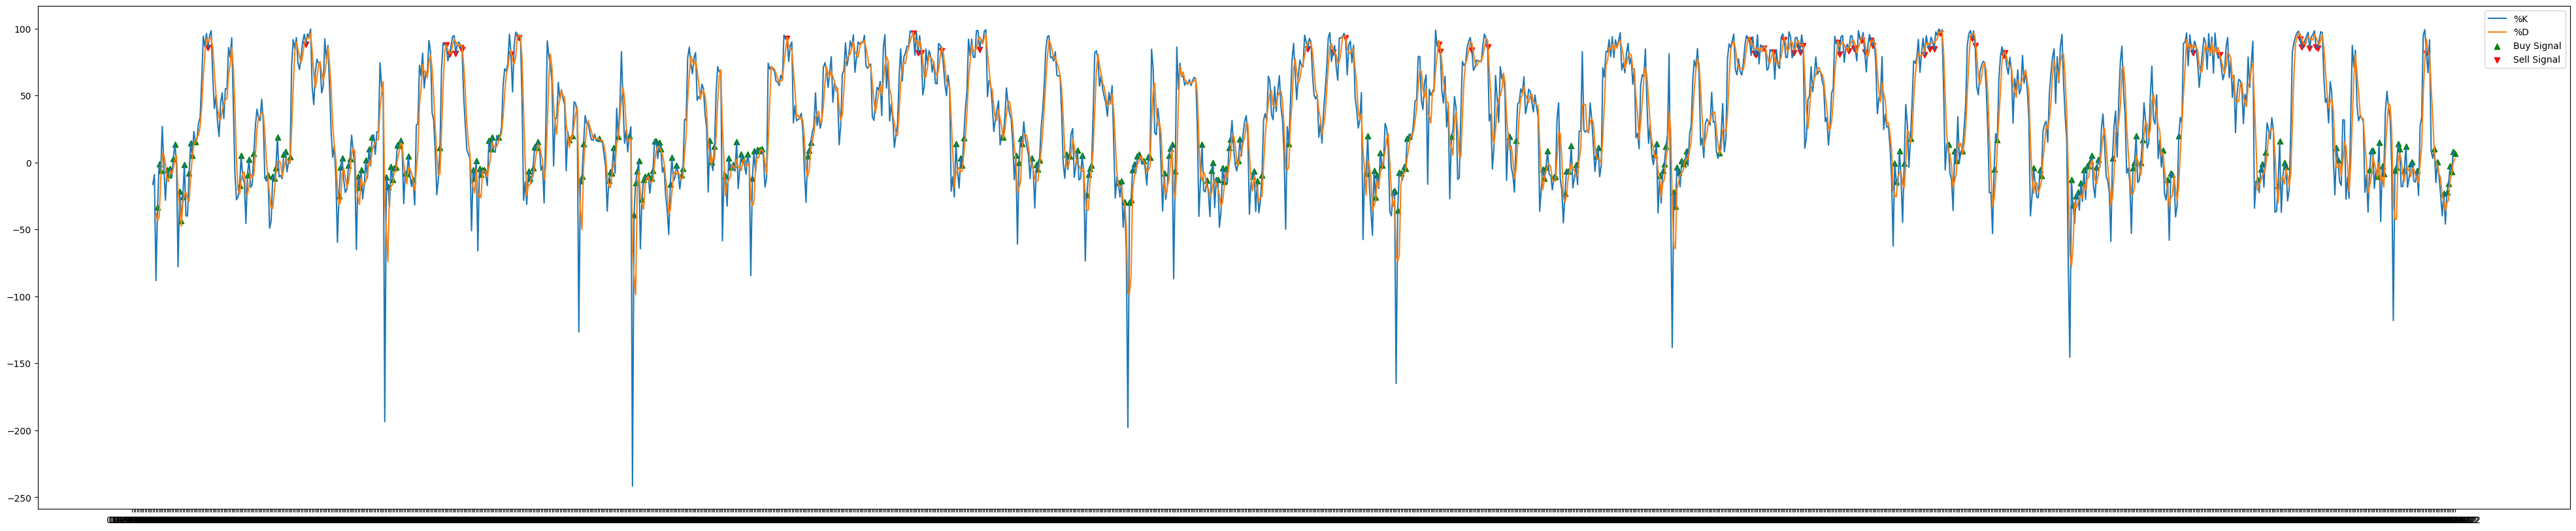

In [51]:
plt.figure(figsize=(50, 10))
plt.plot(df['datetime'], df['%K'], label='%K')
plt.plot(df['datetime'], df['%D'], label='%D')
plt.scatter(df[df['Buy_Signal1'] == 1]['datetime'], df[df['Buy_Signal1'] == 1]['%K'], marker='^', color='g', label='Buy Signal')
plt.scatter(df[df['Buy_Signal1'] == -1]['datetime'], df[df['Buy_Signal1'] == -1]['%K'], marker='v', color='r', label='Sell Signal')
plt.legend()
plt.show()


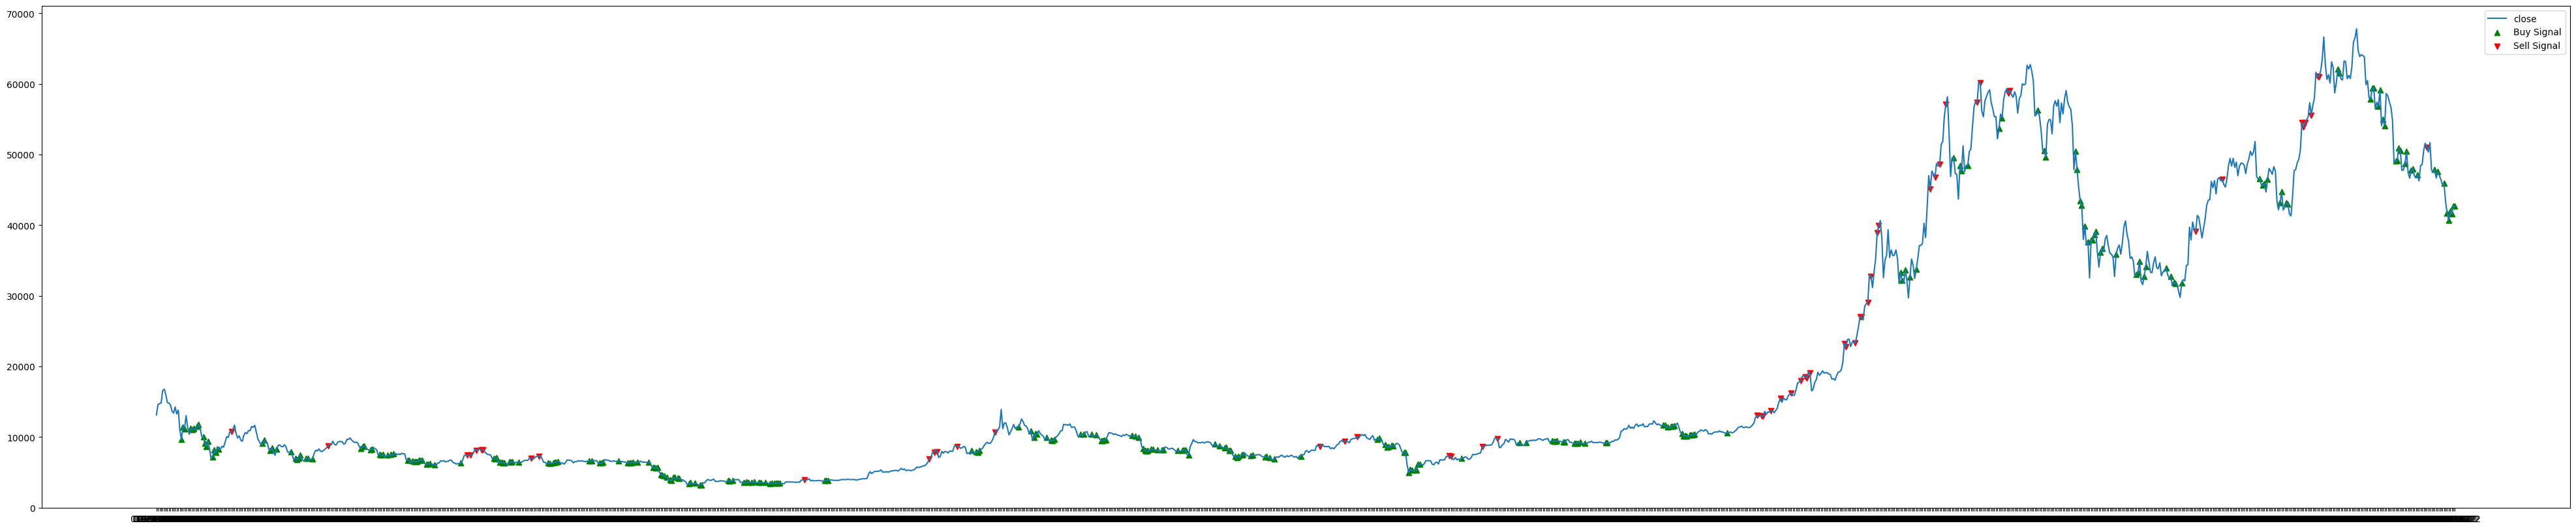

In [52]:
plt.figure(figsize=(50, 10))
plt.plot(df['datetime'], df['close'], label='close')
plt.scatter(df[df['Buy_Signal1'] == 1]['datetime'], df[df['Buy_Signal1'] == 1]['close'], marker='^', color='g', label='Buy Signal')
plt.scatter(df[df['Buy_Signal1'] == -1]['datetime'], df[df['Buy_Signal1'] == -1]['close'], marker='v', color='r', label='Sell Signal')
plt.legend()
plt.show()

In [53]:
#bullish price falls adl rise/ bearish price up adl down
df['A/D']=(2*df['close']-df['high']-df['low'])*df['volume']/(df['high']-df['low'])
df

,datetime,high,low,close,open,volume,%K,%D,Buy_Signal1,A/D
0,01-01-2018,13818.55,12750.00,13135.00,13715.65,6970.441076,NaN,NaN,0,-1947.522515
1,02-01-2018,14750.00,12890.02,14580.00,13135.00,16359.347340,NaN,NaN,0,13368.896854
2,03-01-2018,15473.49,14150.00,14749.97,14576.87,19457.238600,NaN,NaN,0,-1816.365691
3,04-01-2018,15280.00,13918.04,14811.00,14710.00,18783.876560,NaN,NaN,0,5847.170480
4,05-01-2018,17118.13,14600.00,16579.00,14805.01,22383.657330,NaN,NaN,0,12799.004293
...,...,...,...,...,...,...,...,...,...,...
1468,08-01-2022,42246.37,40501.00,40679.82,41707.04,27031.900870,-15.917587,-28.003437,1,-21492.852401
1469,09-01-2022,42300.00,40520.00,41966.99,40679.82,27291.009660,-2.838757,-13.594014,1,17079.572439
1470,10-01-2022,42786.70,39650.00,41604.58,41966.99,51064.904360,-6.779040,-8.511795,1,12575.508025
1471,11-01-2022,43100.00,41158.99,42755.00,41604.58,38062.818280,8.071071,-0.515575,1,24532.056144


In [54]:
'''ADL moves in the same direction as price during a strong uptrend or a strong downtrend
divergence:
Bullish ADL Divergence is when the ADL is trending upwards while price is trending down..accumulation ...bullish
when the ADL is trending downwards while price is on the rise. In this instance, ADL is signaling an increase in
selling pressure (Distribution), and price may soon take a downwards turn.
unreliable if there is any type of gap in price, it won’t be picked up by the ADL and therefore the line and price will become out of synch.'''
#unable to implement

'ADL moves in the same direction as price during a strong uptrend or a strong downtrend\ndivergence:\nBullish ADL Divergence is when the ADL is trending upwards while price is trending down..accumulation ...bullish\nwhen the ADL is trending downwards while price is on the rise. In this instance, ADL is signaling an increase in \nselling pressure (Distribution), and price may soon take a downwards turn.\nunreliable if there is any type of gap in price, it won’t be picked up by the ADL and therefore the line and price will become out of synch.'

In [55]:
#Keltner Channels
ema_period=20
atr_period=10
df['kcmiddle']= df['close'].ewm(span=ema_period).mean()

df['tr']=df['high']-df['low']
df['atr'] = df['tr'].rolling(atr_period).mean()

df['kcupper'] = df['kcmiddle'] + 2 * df['atr']
df['kclower'] = df['kcmiddle'] - 2 * df['atr']

# Drop intermediate columns
df=df.drop(['tr','atr'],axis=1)
df

,datetime,high,low,close,open,volume,%K,%D,Buy_Signal1,A/D,kcmiddle,kcupper,kclower
0,01-01-2018,13818.55,12750.00,13135.00,13715.65,6970.441076,NaN,NaN,0,-1947.522515,13135.000000,NaN,NaN
1,02-01-2018,14750.00,12890.02,14580.00,13135.00,16359.347340,NaN,NaN,0,13368.896854,13893.625000,NaN,NaN
2,03-01-2018,15473.49,14150.00,14749.97,14576.87,19457.238600,NaN,NaN,0,-1816.365691,14208.069750,NaN,NaN
3,04-01-2018,15280.00,13918.04,14811.00,14710.00,18783.876560,NaN,NaN,0,5847.170480,14382.126391,NaN,NaN
4,05-01-2018,17118.13,14600.00,16579.00,14805.01,22383.657330,NaN,NaN,0,12799.004293,14913.531422,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,08-01-2022,42246.37,40501.00,40679.82,41707.04,27031.900870,-15.917587,-28.003437,1,-21492.852401,46490.675286,50678.105286,42303.245286
1469,09-01-2022,42300.00,40520.00,41966.99,40679.82,27291.009660,-2.838757,-13.594014,1,17079.572439,46059.848116,50205.864116,41913.832116
1470,10-01-2022,42786.70,39650.00,41604.58,41966.99,51064.904360,-6.779040,-8.511795,1,12575.508025,45635.536867,49999.240867,41271.832867
1471,11-01-2022,43100.00,41158.99,42755.00,41604.58,38062.818280,8.071071,-0.515575,1,24532.056144,45361.200023,49657.780023,41064.620023


In [56]:
'''Bullish--breakthrough above the upper band--uptrend is likely to continue and vice versa'''
df['Buy_Signal2'] = 0

for i in range(1,len(df)):
 if( df.iloc[i,3]< df.iloc[i,12]):
    df.at[i,'Buy_Signal2']= -1

 if (df.iloc[i,3]  > df.iloc[i,11]):
    df.at[i,'Buy_Signal2']= 1
df


,datetime,high,low,close,open,volume,%K,%D,Buy_Signal1,A/D,kcmiddle,kcupper,kclower,Buy_Signal2
0,01-01-2018,13818.55,12750.00,13135.00,13715.65,6970.441076,NaN,NaN,0,-1947.522515,13135.000000,NaN,NaN,0
1,02-01-2018,14750.00,12890.02,14580.00,13135.00,16359.347340,NaN,NaN,0,13368.896854,13893.625000,NaN,NaN,0
2,03-01-2018,15473.49,14150.00,14749.97,14576.87,19457.238600,NaN,NaN,0,-1816.365691,14208.069750,NaN,NaN,0
3,04-01-2018,15280.00,13918.04,14811.00,14710.00,18783.876560,NaN,NaN,0,5847.170480,14382.126391,NaN,NaN,0
4,05-01-2018,17118.13,14600.00,16579.00,14805.01,22383.657330,NaN,NaN,0,12799.004293,14913.531422,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,08-01-2022,42246.37,40501.00,40679.82,41707.04,27031.900870,-15.917587,-28.003437,1,-21492.852401,46490.675286,50678.105286,42303.245286,-1
1469,09-01-2022,42300.00,40520.00,41966.99,40679.82,27291.009660,-2.838757,-13.594014,1,17079.572439,46059.848116,50205.864116,41913.832116,0
1470,10-01-2022,42786.70,39650.00,41604.58,41966.99,51064.904360,-6.779040,-8.511795,1,12575.508025,45635.536867,49999.240867,41271.832867,0
1471,11-01-2022,43100.00,41158.99,42755.00,41604.58,38062.818280,8.071071,-0.515575,1,24532.056144,45361.200023,49657.780023,41064.620023,0


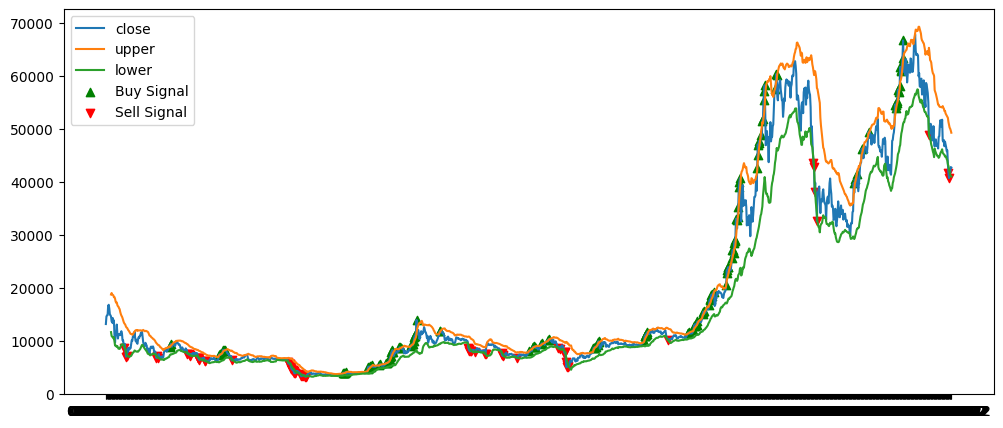

In [58]:
plt.figure(figsize=(12, 5))
plt.plot(df['datetime'], df['close'], label='close')
#plt.plot(df['datetime'], df['kcmiddle'], label='middle')
plt.plot(df['datetime'], df['kcupper'], label='upper')
plt.plot(df['datetime'], df['kclower'], label='lower')

plt.scatter(df[df['Buy_Signal2'] == 1]['datetime'], df[df['Buy_Signal2'] == 1]['close'], marker='^', color='g', label='Buy Signal')
plt.scatter(df[df['Buy_Signal2'] == -1]['datetime'], df[df['Buy_Signal2'] == -1]['close'], marker='v', color='r', label='Sell Signal')
plt.legend()
plt.show()
